Importing the data from JCPS Homeless Student Count excel files and eliminating the unwanted rows. Some schools appear on muliple excel sheets and the data will be kept from only one of the files as noted.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#keeping Brown School from this excel sheet only
elem=pd.read_excel("JCPS_20-21 Homeless.xlsx")
#total elem homeless population
elem_total_homeless=elem.iloc[89]
#district total homeless population
district_total_homeless=elem.iloc[93]

elem.drop(labels=[89,90], inplace=True)
elem.drop(labels=range(92,102), inplace=True)


#keeping Moore Traditional and The Academy @ Shawnee from this excel sheet only
hs=pd.read_excel("JCPS_20-21_HS.xlsx")
#total hs homeless population 
hs_total_homeless=hs.iloc[18]

hs.drop(labels=[18,19,20], inplace=True)
hs.drop(labels=range(23,33), inplace=True)


ms=pd.read_excel("JCPS_20-21_MS.xlsx")
#total ms homeless population
ms_total_homeless=ms.iloc[22]

ms.drop(labels=range(22,37), inplace=True)

Combining the data from excel files and dropping the unwanted columns. Ensuring columns are adding properly according to the UNSUPPRESSED data given.

In [2]:
df=pd.concat([elem, ms, hs])

df.drop(columns=['SLN', 'Male', 'Female', 'Homeless % Among Total Homeless Population'], inplace=True)


for i in range(1,9):
    df[df.columns[i]]=pd.to_numeric(df[df.columns[i]], errors='coerce')
    #df[df.columns[i]]=df[df.columns[i]].fillna(0)
    #df[df.columns[i]]=df[df.columns[i]].astype('int16')

asian_sum=df['Asian'].sum()

totals=df.iloc[:,range (1,8)].sum()
df.sort_values(by='School',inplace=True, ignore_index=True)

In [3]:
df.head()

,School,American Indian / Alaska Native,Asian,African American,Hispanic,Native Hawaiian / Pacific Islander,Two or More,White,Total Homeless Count
0,Alex R Kennedy,NaN,NaN,7.0,NaN,NaN,NaN,7.0,16.0
1,Atherton High,NaN,NaN,15.0,NaN,NaN,4.0,8.0,30.0
2,Atkinson Academy,NaN,NaN,12.0,NaN,NaN,7.0,3.0,22.0
3,Auburndale Elementary,NaN,NaN,7.0,3.0,NaN,5.0,5.0,21.0
4,Audubon Traditional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Pie Charts  The first shows the unsuppressed data while the second gives a better picture including the suppressed numbers.

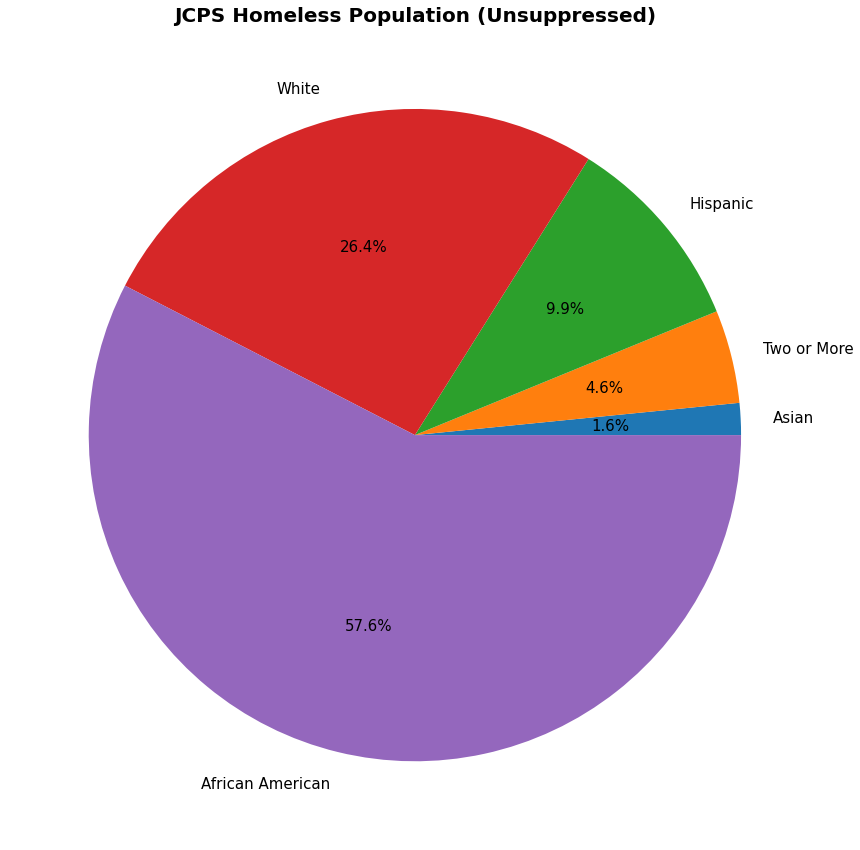

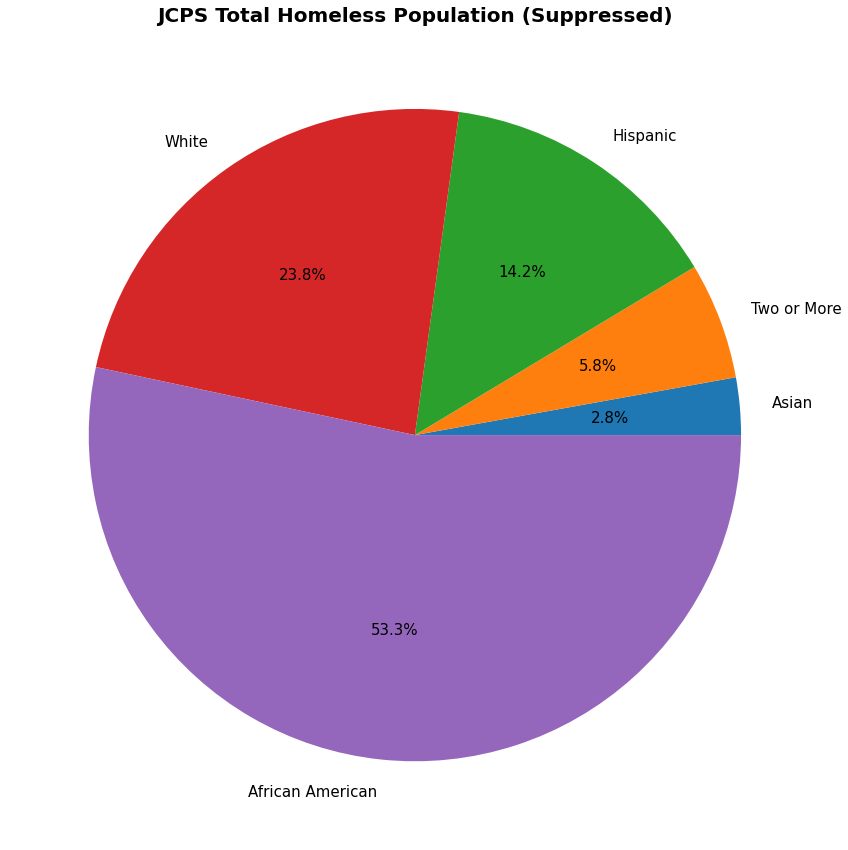

In [4]:
#JCPS Unsuppressed Homeless Population Data (sum of columns)
plt.pie
plt.figure(figsize=(15,15))
plt.title('JCPS Homeless Population (Unsuppressed)', fontsize=20, fontweight="bold")
dataframe=pd.DataFrame({"Race": ['Asian', 'Two or More', 'Hispanic', 'White', 'African American'], "Per_Group": [52, 152, 325, 868, 1896]})
plt.pie(dataframe["Per_Group"], labels =dataframe["Race"], autopct='%1.1f%%',textprops={'fontsize': 15} )

#JCPS Total Homeless Population Data (includes suppressed data)
plt.pie
plt.figure(figsize=(15,15))
plt.title('JCPS Total Homeless Population (Suppressed)', fontsize=20, fontweight="bold")
dataframe=pd.DataFrame({"Race": ['Asian', 'Two or More', 'Hispanic', 'White', 'African American'], "Per_Group": [112, 228, 561, 940, 2105]})
plt.pie(dataframe["Per_Group"], labels =dataframe["Race"], autopct='%1.1f%%',textprops={'fontsize': 15} )

plt.show()

In [5]:
##Check to ensure the dataframe dispays correctly
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

Sorted to see which schools have the highest population of homeless students 

In [6]:
sort_by_total = df.sort_values('Total Homeless Count', ascending=False)

Importing the data from JCPS Student Enrollment excel files to use in addition to the homeless dataset to calculate the percentage of homeless students per school. The files also show why some data in the homeless population dataset was suppressed. Eliminating the unwanted rows.

In [7]:
elem_enrollment=pd.read_excel("jcps_20-21_enrollment_elem.xlsx")
#total elementary students enrolled
elem_total_enrollment=elem_enrollment.iloc[91]
#total district enrollment (including Pre-K)
total_district_enrollment=elem_enrollment.iloc[95]

elem_enrollment.drop(labels=range(91,97), inplace=True)


ms_enrollment=pd.read_excel("jcps_20-21_enrollment_ms.xlsx")
#total ms students enrolled
ms_total_enrollment=ms_enrollment.iloc[25]

ms_enrollment.drop(labels=range(25,31), inplace=True)


hs_enrollment=pd.read_excel("jcps_20-21_enrollment_hs.xlsx")
#total hs students enrolled
hs_total_enrollment=hs_enrollment.iloc[21]

hs_enrollment.drop(labels=range(21,27), inplace=True)


df2=pd.concat([elem_enrollment, ms_enrollment, hs_enrollment])

#dropped unwanted columns, leaving school name and total enrollment then changed Unnamed: 1 column name to school.
df2.drop(df2.columns.difference(['Unnamed: 1', 'Total']), axis=1, inplace=True)
df2.rename(columns = {'Unnamed: 1':'School'}, inplace=True)


df.drop(df.columns.difference(['School', 'Total Homeless Count']), axis=1, inplace=True)
df2.drop(df2.columns.difference(['School', 'Total']), axis=1, inplace=True)
#hs_enrollment.head(80)
#df2.tail(80)

df2.sort_values(by='School',inplace=True, ignore_index=True)

Prep enrollment list

In [8]:
#df2.head(137)

In [9]:

df2.loc[df2.index==57, 'School']='Brown'

df2.loc[df2.index==58, 'School']='Brown'
df2.loc[df2.index==59, 'School']='Brown'
df2.loc[df2.index==57, 'Total']=754.0
df2.iloc[[57,58,59]]



df2.iloc[[57,58,59]]

#df2[df2.School.str.endswith('Moore')]
#print(df2.School.str.endswith('Moore'))
df2.loc[df2.index==81, 'School']='Moore'
df2.loc[df2.index==80, 'School']='Moore'
df2.loc[df2.index==80, 'Total']=2384
df2.iloc[[80,81]]

df2.loc[df2.index==117, 'School']='Shawnee'
df2.loc[df2.index==118, 'School']='Shawnee'
df2.loc[df2.index==117, 'Total']=536

#df[~df.id.isin(delRows)]
print(df2[df2.School.str.contains('Roosevelt')])
del_rows= [81,58,59,102,118]
df2=df2[~df2.index.isin(del_rows)]
df2.reset_index(inplace=True, drop=True)
print(df2[df2.School.str.endswith('Moore')])
print(df2[df2.School.str.endswith('Brown')])
print(df2[df2.School.str.endswith('Shawnee')])



              School  Total
102  Roosevelt-Perry  197.0
   School   Total
78  Moore  2384.0
   School  Total
57  Brown  754.0
      School  Total
113  Shawnee  536.0


Prep homeless list

In [10]:
print(df[df.School.str.endswith('Shawnee')])
df.loc[df.index==114, 'School']='Shawnee'
df2.loc[df2.index==91, 'School']='Olmsted North'
df2.loc[df2.index==92, 'School']='Olmsted South'
df.loc[df.index==38, 'School']='Olmsted North'
df.loc[df.index==39, 'School']='Olmsted South'

#d = {88: 89, 89: 88}
#df2= df2.rename(d).sort_index()
#df2.reset_index(inplace=True, drop=True)

print(df2[df2.School.str.contains('Norton')])
#print(df2[df2.School.str.contains('Olmsted')])
#print(df[df.School.str.contains('Olmsted')])
print(df[df.School.str.contains('Norton')])

                    School  Total Homeless Count
114  The Academy @ Shawnee                  35.0
            School  Total
88          Norton  703.0
89  Norton Commons  537.0
               School  Total Homeless Count
90     Norton Commons                  14.0
91  Norton Elementary                  11.0


In [11]:
#homeless_schools = df.School.unique()
#homeless_schools.sort()
#enrollment_schools = df2.School.unique()
#enrollment_schools.sort()
#print(len(homeless_schools),len(enrollment_schools))
#list(homeless_schools).sort() == list(enrollment_schools).sort()
#print(df.columns, df2.columns)

#print(homeless_schools[1:10],enrollment_schools[1:10])
df.sort_values(by='School',inplace=True, ignore_index=True)
df2.sort_values(by='School',inplace=True, ignore_index=True)
df.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
a=df2.iloc[88].copy()
b=df2.iloc[89].copy()
df2.iloc[88]=b
df2.iloc[89]=a
#df2.reset_index(inplace=True, drop=True)
final_df = df.merge(df2, left_index=True, right_index=True, suffixes=['_homeless', '_enrollment'])
final_df.head()
final_df.shape
final_df.describe()
final_df.info()
final_df.head(132)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   School_homeless       132 non-null    object 
 1   Total Homeless Count  132 non-null    float64
 2   School_enrollment     132 non-null    object 
 3   Total                 132 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.2+ KB


,School_homeless,Total Homeless Count,School_enrollment,Total
0,Alex R Kennedy,16.0,Alex R Kennedy,296.0
1,Atherton High,30.0,Atherton,1497.0
2,Atkinson Academy,22.0,Atkinson,328.0
3,Auburndale Elementary,21.0,Auburndale,575.0
4,Audubon Traditional,5.0,Audubon Trad,616.0
5,Ballard High,25.0,Ballard,2040.0
6,Barret Traditional,5.0,Barret Trad,634.0
7,Bates Elementary,8.0,Bates,568.0
8,Blake Elementary,14.0,Blake,446.0
9,Bloom Elementary,3.0,Bloom,557.0


In [22]:
final_df['Percentage of Homeless Students'] = (final_df['Total Homeless Count']/final_df['Total']*100).apply("{:.02f}".format)


In [23]:
final_df['Percentage of Homeless Students'] = final_df['Percentage of Homeless Students'].astype(float)

In [24]:
final_df

,School_homeless,Total Homeless Count,School_enrollment,Total,Percentage of Homeless Students
0,Alex R Kennedy,16.0,Alex R Kennedy,296.0,5.41
1,Atherton High,30.0,Atherton,1497.0,2.00
2,Atkinson Academy,22.0,Atkinson,328.0,6.71
3,Auburndale Elementary,21.0,Auburndale,575.0,3.65
4,Audubon Traditional,5.0,Audubon Trad,616.0,0.81
5,Ballard High,25.0,Ballard,2040.0,1.23
6,Barret Traditional,5.0,Barret Trad,634.0,0.79
7,Bates Elementary,8.0,Bates,568.0,1.41
8,Blake Elementary,14.0,Blake,446.0,3.14
9,Bloom Elementary,3.0,Bloom,557.0,0.54
